### Задача 1: сравнение предложений

In [26]:
import re
import numpy as np

In [27]:
file_obj = open('sentences.txt')
sentences = list(file_obj)
file_obj.close()
all_words = []
words_in_sentences = []
for sentence in sentences:
    sentence = sentence.lower()
    words = [word for word in re.split('[^a-z]', sentence) if word]
    d = dict()
    for word in words:
        if word not in all_words:
            all_words.append(word)
        if word not in d:
            d[word] = 0
        d[word] += 1
    words_in_sentences.append(d)

In [28]:
n = len(words_in_sentences)
d = len(all_words)
matrix = np.zeros((n, d))
for i in range(n):
    for word, count in words_in_sentences[i].items():
        j = all_words.index(word)
        matrix[i, j] = count

In [29]:
from scipy.spatial.distance import cosine

In [30]:
cosine_distances = []
for i in range(n):
    cosine_distances.append(cosine(matrix[0, :], matrix[i, :]))

In [31]:
min1 = cosine_distances[1]
min2 = cosine_distances[2]
if (min2 < min1):
    min1, min2 = min2, min1
for i in range(3, n):
    if min1 < cosine_distances[i] < min2:
        min2 = cosine_distances[i]
    elif cosine_distances[i] < min1:
        min2 = min1
        min1 = cosine_distances[i]
indeces = [0, cosine_distances.index(min1), cosine_distances.index(min2)]
for i in indeces:
    print(i, ': ', sentences[i])

0 :  In comparison to dogs, cats have not undergone major changes during the domestication process.

6 :  Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).

4 :  In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.



### Задача 2: аппроксимация функции

In [38]:
from scipy.linalg import solve
from math import exp, sin
%matplotlib inline
from matplotlib import pylab as plt

In [39]:
def f(x):
    return sin(x/5)*exp(x/10) + 5*exp(-x/2)

def set_matrix_A(X, n):
    A = []
    for x in X:
        r = []
        for i in range(n+1):
            r.append(x**i)
        A.append(r)
    return np.array(A)

def set_matrix_b(X):
    b = []
    for x in X:
        b.append(f(x))
    return np.array(b)

def plot_f(X):
    y = [f(x) for x in X]
    plt.plot(X, y)
    
def plot_polynomial(X, w):
    y = []
    for x in X:
        res = 0
        for i in range(len(w)):
            res += w[i]*(x**i)
        y.append(res)
    plt.plot(X, y)

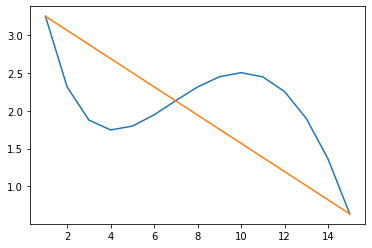

In [40]:
n = 1
X = [1, 15]
A = set_matrix_A(X, n)
b = set_matrix_b(X)
w = solve(A, b)
plot_f(range(1, 16))
plot_polynomial(range(1, 16), w)

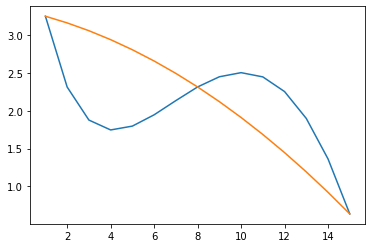

In [41]:
n = 2
X = [1, 8, 15]
A = set_matrix_A(X, n)
b = set_matrix_b(X)
w = solve(A, b)
plot_f(range(1, 16))
plot_polynomial(range(1, 16), w)

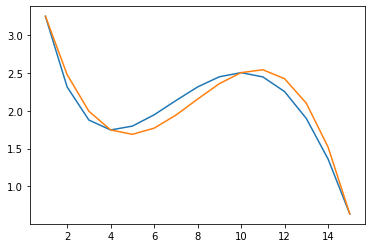

In [42]:
n = 3
X = [1, 4, 10, 15]
A = set_matrix_A(X, n)
b = set_matrix_b(X)
w = solve(A, b)
plot_f(range(1, 16))
plot_polynomial(range(1, 16), w)

In [43]:
print(*w)

4.362641535118072 -1.2955258656948436 0.1933368470215116 -0.008235651173320552
